# Задание 1

---

Напишите программу, которая будет решать систему линейных уравнений вида:

\begin{matrix} a_{11}x+a_{12}y=b_{1}&(1) \\ a_{21}x+a_{22}y=b_{2} &(2) \end{matrix}
​	
На вход программа должна принимать 2 строки.

Каждая строка содержит 3 действительных числа через пробел: коэффициенты a и b.

На выходе программа должна выдавать значения x и y в одну строку через пробел.
 

Примечание 1. Для разделения строки на отдельные элементы используйте функцию split()

Примечание 2. В качестве разделителя между целой и дробной частью используйте точку, например 0.2

In [2]:
import numpy as np

# Функция для решения СЛАУ методом Крамера
def linear_equation_solver(a_11, a_12, b_1, a_21, a_22, b_2):
  matrix_1 = np.array([[a_11, a_12], [a_21, a_22]])
  matrix_2 = np.array([[b_1, a_12], [b_2, a_22]])
  matrix_3 = np.array([[a_11, b_1], [a_21, b_2]])
  
  det_1 = np.linalg.det(matrix_1)
  
  if det_1:

    det_2 = np.linalg.det(matrix_2)
    det_3 = np.linalg.det(matrix_3)

    x = det_2 / det_1
    y = det_3 / det_1

    return 'Решение: {} {}'.format(x, y)

  return 'Нет решений'

def main():
  a_11, a_12, b_1 = map(float, input('Введите аргументы первого уравнения:\n').split())
  a_21, a_22, b_2 = map(float, input('Введите аргументы второго уравнения:\n').split())

  result = linear_equation_solver(a_11, a_12, b_1, a_21, a_22, b_2)

  print(result)

if __name__ == "__main__":
  main()


Введите аргументы первого уравнения:
3 -2 -6
Введите аргументы второго уравнения:
5 1 3
Решение: 0.0 2.9999999999999996


# Задание 2

Напишите функцию `decorate_matrix`, которая получает на вход одно целое число больше единицы. Функция должна возвращать матрицу n на n, у которой на границах стоят единицы, а на всех остальных позициях(если остались позиции не на границах) стоят нули.

```
# ожидаемый резальтат для аргумента 5
array([[1., 1., 1., 1., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 0., 0., 0., 1.],
[1., 1., 1., 1., 1.]])
```



In [3]:
import numpy as np

# Функция декорирования матрицы
def decorate_matrix(n):
  if n < 2:
    return "Введённое значение меньше или равно единице"

  # сделаем матрицу из единичек
  matrix = np.ones((n, n))

  # пройдёмся по ней и заменим всё, что в центре на нули
  for i in range(1, n - 1):
    for j in range(1, n - 1):
      matrix[i, j] = 0

  return matrix


def main():
  n = int(input('Введите одно целое число больше единицы:\n'))

  result = decorate_matrix(n)
  print('Результат:\n', result)


if __name__ == "__main__":
  main()


Введите одно целое число больше единицы:
8
Результат:
 [[1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1.]]


# Задание 3

1) реализуйте 2 функции:

$f(x) = (x+a)^2 - b$ 

$g(x) = |f(x)|$

2) Найдите аргументы, при которых достигается минимум функций $f(x)$ и $g(x)$

Пример. 
Входные значение: $a=3$ и $b=4$

Выходные значения:

`-3.0 -1.0`

In [4]:
from scipy.misc import derivative
from sympy import *
from sympy.solvers import solve


def f(x):
  return (x + a)**2 - b


def g(x):
  return abs(f(x))


# Получаем минимум из экстремумов
def classify_ext(ext, ftype='f'):
  result = []
  ext_vals = []

  if len(ext) == 1:
    result.append({'Значение': ext[0], 'Тип': 'Минимум'})
    return result

  for i in range(len(ext)):
    ext_val = 0
    _ext = ext[i]

    if ftype == 'f':
      ext_val = f(_ext)
      ext_vals.append(ext_val)

    elif ftype == 'g':
      ext_val = g(_ext)
      ext_vals.append(ext_val)

  result.append({'Значение': ext[ext_vals.index(max(ext_vals))], 'Тип': 'Максимум'})

  del ext[ext_vals.index(max(ext_vals))]

  for _val in ext:
    result.append({'Значение': _val, 'Тип': 'Минимум'})
    
  return result


def main(x, a, b):

  f_ext = [round(c, 1) for c in solve(derivative(f, x, dx=1e-6), x)]
  f_res = classify_ext(f_ext, 'f')
  print('Экстремумы f(x):', f_res)
  
  g_ext = [round(c, 1) for c in solve(derivative(g, x, dx=1e-6), x)]
  g_res = classify_ext(g_ext, 'g')
  print('Экстремумы g(x):', g_res)

  return f_res, g_res


if __name__ == "__main__":
  x = Symbol('x', real=True)

  a = int(input('Введите a:\n'))
  b = int(input('Введите b:\n'))

  f_res, g_res = main(x, a, b)


Введите a:
3
Введите b:
4
Экстремумы f(x): [{'Значение': -3.0, 'Тип': 'Минимум'}]
Экстремумы g(x): [{'Значение': -3.0, 'Тип': 'Максимум'}, {'Значение': -5.0, 'Тип': 'Минимум'}, {'Значение': -1.0, 'Тип': 'Минимум'}]


 # Задание 4

Постройте графики для функций из предыдущего задания и отметьте другим цветом на графиках точки найденных минимумов.

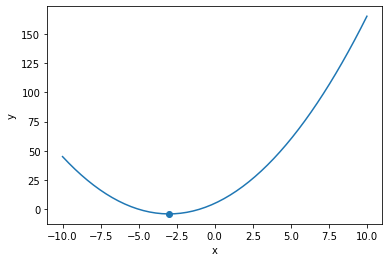

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 50)
y = list(map(f, x))

plt.plot(x, y)
plt.ylabel("y")
plt.xlabel("x")
plt.scatter([f_res[0]['Значение']], [f(f_res[0]['Значение'])])


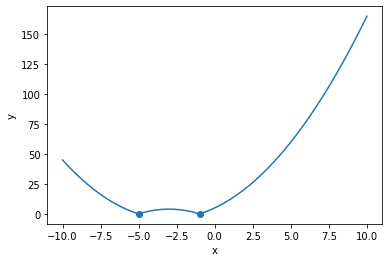

In [6]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 50)
y = list(map(g, x))

plt.plot(x, y)
plt.ylabel("y")
plt.xlabel("x")
plt.scatter([g_res[1]['Значение'], g_res[2]['Значение']], [g(g_res[1]['Значение']), g(g_res[2]['Значение'])])


# Задание 5

1000 человек бросают монетку. Каждый бросил 10 раз подряд.

 1. Какова вероятность того, что хотя бы у одного человека монетка выпала 10 раз подряд той же самой сторой (орлом или решкой)? 
 2. Какова вероятность того, что хотя бы у одного человека монетка выпала 8 раз подряд той же самой сторой (орлом или решкой)? 
 3. Какова вероятность того, что ровно у троих человек из 1000 монетка выпала 10 раз подряд той же самой сторой (орлом или решкой)?

In [7]:
import math

def prob_task_one():
  events_amount = 1000
  toss_amount = 10
  same_side_amount = 10
  combinations_amount = 2**toss_amount
  all_combinations_amount = math.factorial(toss_amount) / (math.factorial(same_side_amount) * math.factorial(toss_amount - same_side_amount))
  prob = all_combinations_amount / combinations_amount
  result = 1 - (1 - prob)**events_amount
  return result

print('Задача один:\n')
prob_task_one()


Задача один:



0.623576201943276

In [8]:
import math

def prob_task_two():
  events_amount = 1000
  toss_amount = 10
  same_side_amount = 8
  combinations_amount = 2**toss_amount
  all_combinations_amount = math.factorial(toss_amount) / (math.factorial(same_side_amount) * math.factorial(toss_amount - same_side_amount))
  prob = all_combinations_amount / combinations_amount
  result = 1 - (1 - prob)**events_amount
  return result

print('Задача два:\n')
prob_task_two()


Задача два:



1.0

In [9]:
import math

def prob_task_three():
  events_amount = 1000
  toss_amount = 10
  events_success = 3
  prob = 2 / 2**toss_amount
  not_prob = 1 - prob
  all_combinations_amount = math.factorial(events_amount) / (math.factorial(events_success) * math.factorial(events_amount - events_success))
  result = prob**events_success * all_combinations_amount * not_prob**(events_amount - events_success)
  return result

def main():
  print('Задача три:\n')
  print(prob_task_three())

if __name__ == "__main__":
  main()


Задача три:

0.1762873858121736
